# Linear Regression Project


## Importing data

In [5]:
import numpy as np
import matplotlib.pyplot as plt

points = np.genfromtxt("data.csv", delimiter=',')

## Plotting the data using matplotlib

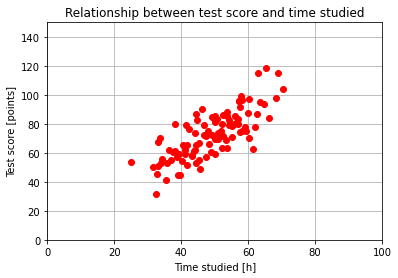

In [6]:
fig, ax = plt.subplots() #create a figure and a axes project
ax.plot(points[:,0], points[:,1], 'ro')
ax.axis([0,100,0,150])
ax.set(xlabel="Time studied [h]", ylabel="Test score [points]", title="Relationship between test score and time studied") #titles (tottenham fans would not get it)
ax.grid() #show the grid
plt.show()

## Train function

In [13]:
def train() :
    #define the Hyperparameters
    learning_rate = 0.0001
    initial_b = 0
    initial_m = 0
    num_iterations = 1000
    
    # Start the gradient descent algorithm
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b,m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    
    # return the final result to the global scope
    return [b,m]

## Gradient descent function


In [8]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations) :
    b = starting_b
    m = starting_m
    
    for i in range(num_iterations) :
        b, m = step_gradient(b, m, np.array(points), learning_rate)
        if i%100 == 0 :
            print("Iteration {0}: b = {1:.2f}, m = {2:.2f}, error = {3:.5f}".format(i, b, m, compute_error_for_line_given_points(b, m, points)))
            
    return [b, m]
    

## Step gradient


![title](1_3YJx2rdqMW5ccRJZFH9v6w.png)

In [15]:
def step_gradient(b_current, m_current, points, learningRate) :
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0,len(points)) :
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += -(2/N)*x*( y - ((m_current * x ) + b_current)) #see formula above
        b_gradient += -(2/N)*( y -(( m_current * x ) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    
    return [new_b, new_m]

## Compute error


In [11]:
def compute_error_for_line_given_points(b, m, points) :
    totalError = 0
    for i in range(0, len(points)) : 
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m*x + b)) ** 2
        
    return totalError / float(len(points))

## Train our model


In [16]:
[b, m] = train()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
Iteration 0: b = 0.01, m = 0.74, error = 1484.58656
Iteration 100: b = 0.04, m = 1.48, error = 112.64702
Iteration 200: b = 0.04, m = 1.48, error = 112.64342
Iteration 300: b = 0.05, m = 1.48, error = 112.63982
Iteration 400: b = 0.05, m = 1.48, error = 112.63622
Iteration 500: b = 0.06, m = 1.48, error = 112.63263
Iteration 600: b = 0.07, m = 1.48, error = 112.62905
Iteration 700: b = 0.07, m = 1.48, error = 112.62547
Iteration 800: b = 0.08, m = 1.48, error = 112.62190
Iteration 900: b = 0.08, m = 1.48, error = 112.61834
After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473


## Testing


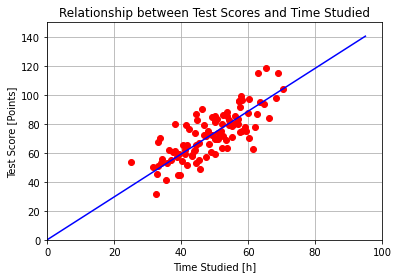

In [17]:
# sample studied hours
h = np.arange(0, 100, 5)

# visualize our model
fig, ax = plt.subplots()  # creates a figure and an axes object
ax.plot(points[:,0], points[:,1], 'ro')
ax.plot(h, m*h + b, 'b')
ax.axis([0, 100, 0, 150])
ax.set(xlabel='Time Studied [h]', ylabel='Test Score [Points]',
       title='Relationship between Test Scores and Time Studied')
ax.grid()
plt.show()